In [2]:
# import libraries as necessary
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report, precision_recall_fscore_support, confusion_matrix
from tensorflow.keras import layers, models
import seaborn as sns

In [3]:
# Define the path where your dataset is stored
dataset_path = "data"
categories = os.listdir(dataset_path)  # List folder names (tumor types)
# print(categories)
data = []
labels = []

In [14]:
# Loop over each folder and load the images
for category in categories:
    folder_path = os.path.join(dataset_path, category)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = load_img(img_path, target_size=(128, 128))  # Resize all images to the same size
        img_array = img_to_array(img)
        data.append(img_array)
        labels.append(category)  # Append the folder name as the label

data = np.array(data) / 255.0  # Normalize the images
labels = np.array(labels)

# Encode the labels (to numeric form)

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [ ]:


# Flatten images for t-SNE
data_flat = data.reshape(len(data), -1)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(data_flat)

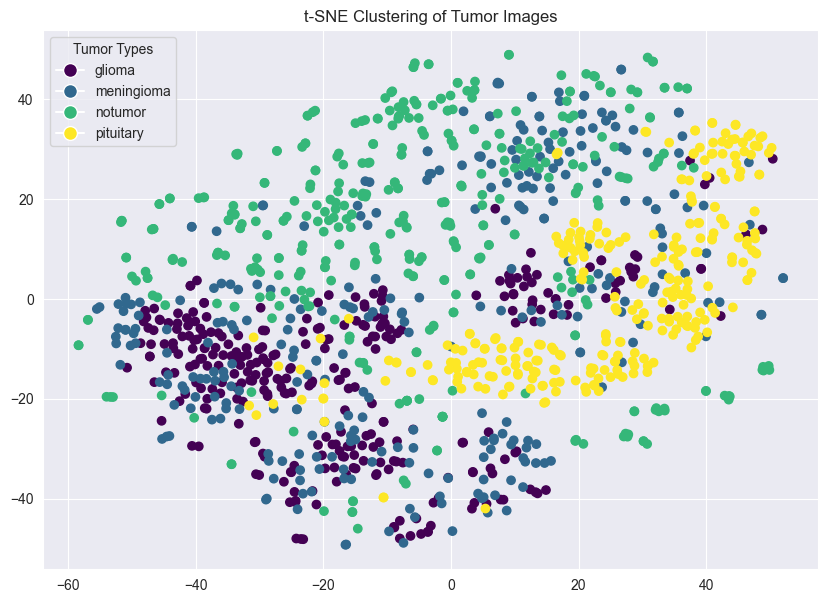

In [22]:
unique_labels = np.unique(labels)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))
# Plot the results
plt.figure(figsize=(10, 7))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='viridis')

text_labels = label_encoder.classes_  # Get the text labels
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=text_labels[i]) for i in range(len(unique_labels))]
plt.legend(handles=handles, title="Tumor Types")

plt.title("t-SNE Clustering of Tumor Images")
plt.show()

In [17]:
label_encoder.classes_

array(['glioma', 'meningioma', 'notumor', 'pituitary'], dtype='<U10')

In [8]:
import tensorflow as tf


# Create CNN model
model = models.Sequential([
    layers.Input(shape=(128, 128, 3)),  # Explicitly defining input shape with Input layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(categories), activation='softmax')  # Output layer for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',  # For multi-class classification
              metrics=['accuracy'])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Train the CNN
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.3978 - loss: 1.9017 - val_accuracy: 0.6844 - val_loss: 0.8298
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.7335 - loss: 0.6690 - val_accuracy: 0.7757 - val_loss: 0.6049
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.8468 - loss: 0.3799 - val_accuracy: 0.8061 - val_loss: 0.5782
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9078 - loss: 0.2704 - val_accuracy: 0.7643 - val_loss: 0.6375
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9514 - loss: 0.1491 - val_accuracy: 0.8289 - val_loss: 0.6085
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9828 - loss: 0.0682 - val_accuracy: 0.8365 - val_loss: 0.6317
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9972 - loss: 0.0232 - val_accuracy: 0.8251 - val_loss: 0.6864
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 1.0000 - loss: 0.0115 - val_accuracy: 0.8175 - v

In [10]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)  # Convert probabilities to class indices



# Accuracy and F2-score for each class
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, digits=4)
print(report)

# For specific F2-score
precision, recall, f2_score, support = precision_recall_fscore_support(
    y_test, y_pred, beta=2, average=None  # Set beta=2 for F2-score, average=None for per-class
)

# Display F2-score for each class
for i, label in enumerate(label_encoder.classes_):
    print(f"Class: {label}, F2-Score: {f2_score[i]:.4f}, Precision: {precision[i]:.4f}, Recall: {recall[i]:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
              precision    recall  f1-score   support

      glioma     0.7656    0.8033    0.7840        61
  meningioma     0.7037    0.6333    0.6667        60
     notumor     0.9595    0.8875    0.9221        80
   pituitary     0.8451    0.9677    0.9023        62

    accuracy                         0.8289       263
   macro avg     0.8185    0.8230    0.8188       263
weighted avg     0.8292    0.8289    0.8271       263

Class: glioma, F2-Score: 0.7955, Precision: 0.7656, Recall: 0.8033
Class: meningioma, F2-Score: 0.6463, Precision: 0.7037, Recall: 0.6333
Class: notumor, F2-Score: 0.9010, Precision: 0.9595, Recall: 0.8875
Class: pituitary, F2-Score: 0.9404, Precision: 0.8451, Recall: 0.9677


In [11]:

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Per-class accuracy calculation
per_class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

# Display accuracy for each class
for i, label in enumerate(label_encoder.classes_):
    print(f"Class: {label}, Accuracy: {per_class_accuracy[i]:.4f}")

Class: glioma, Accuracy: 0.8033
Class: meningioma, Accuracy: 0.6333
Class: notumor, Accuracy: 0.8875
Class: pituitary, Accuracy: 0.9677


In [12]:
class_labels = np.unique(label_encoder.classes_)

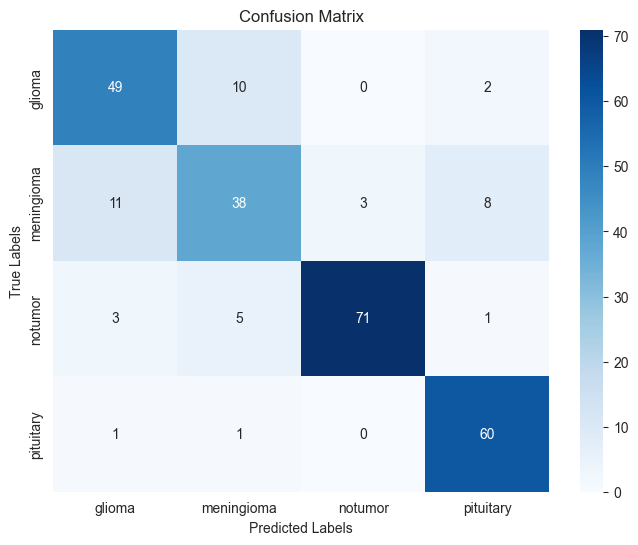

In [13]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()